In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv("/content/garments_worker_productivity.csv")
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


Checking for null and '?' values

In [68]:
data.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [69]:
(data=='?').sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [70]:
data.index[data.duplicated()]

Int64Index([], dtype='int64')

In [71]:
data["wip"].describe()

count      691.000000
mean      1190.465991
std       1837.455001
min          7.000000
25%        774.500000
50%       1039.000000
75%       1252.500000
max      23122.000000
Name: wip, dtype: float64

In [72]:
data["wip"].value_counts()

1039.0    5
1282.0    4
1263.0    3
1216.0    3
1069.0    3
         ..
1635.0    1
1519.0    1
1337.0    1
1118.0    1
914.0     1
Name: wip, Length: 548, dtype: int64

Replacing null values in wip with median

In [73]:
data["wip"].fillna(data["wip"].median(),inplace=True)

In [74]:
data.isna().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [75]:
data['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [76]:
def plotVsY():
  pos=1
  plt.figure(figsize=(20,20))
  for c in list(data.columns)[:-1]:
    plt.subplot(4,4,pos)
    plt.xlabel(c)
    plt.ylabel('actual_productivity')
    plt.scatter(data[c],data['actual_productivity'])
    pos+=1

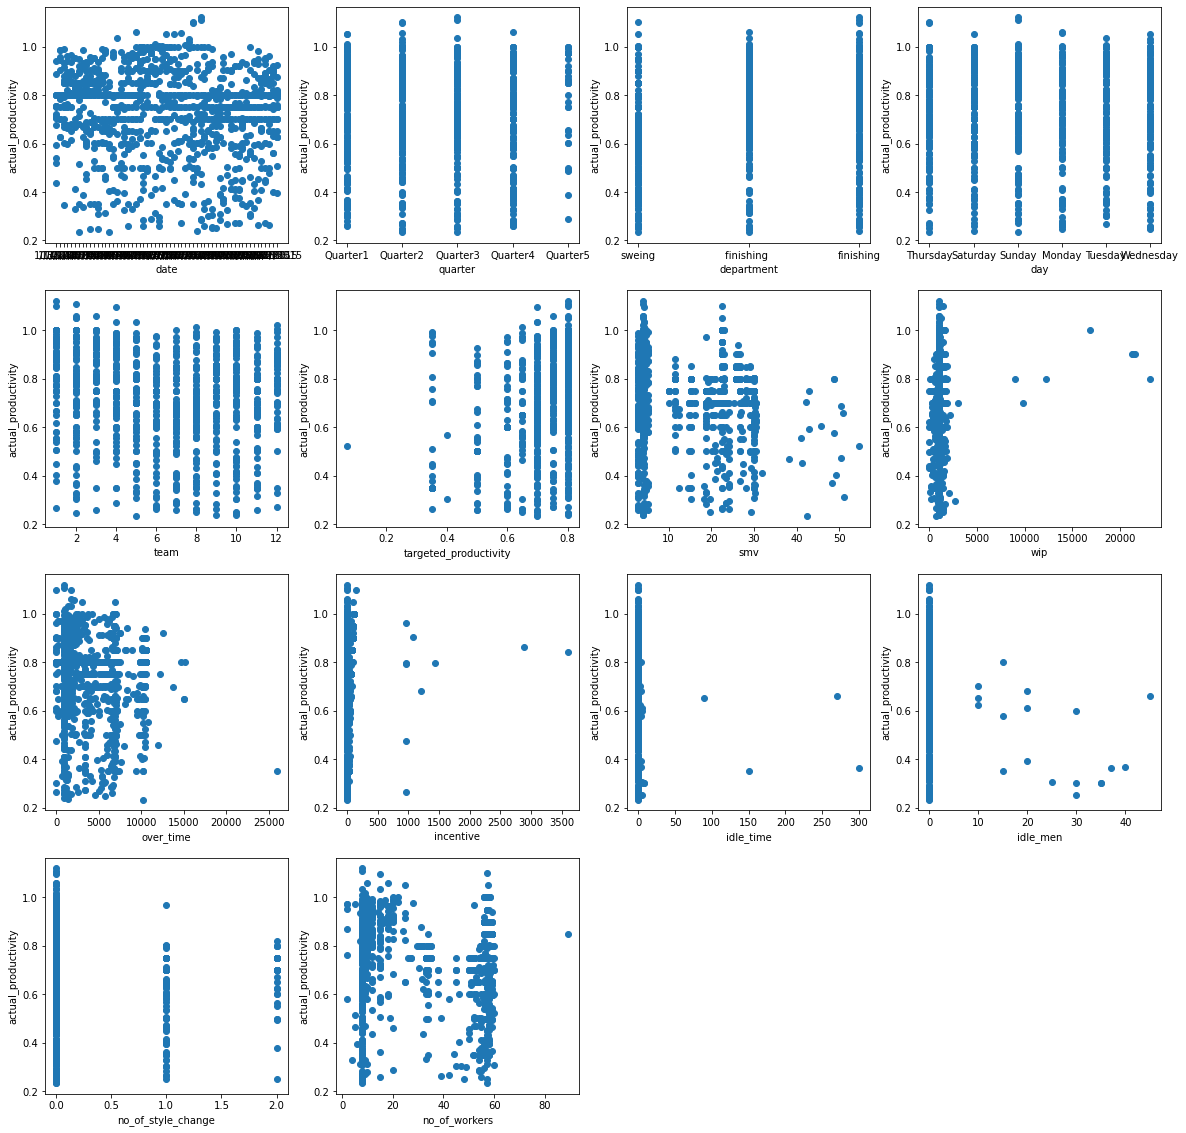

In [77]:
plotVsY()

We will remove the categorical data like 'date','quarter','department','day', and 'team'. They dont seem to cause any influence on the output

In [78]:
data.drop(axis="columns", labels=['date','quarter','department','day','team'], inplace=True)

We will remove the rows where actual productivity>0 (as its impossible!)

In [79]:
data.drop(axis="rows", labels=data.index[data['actual_productivity']>1], inplace=True)

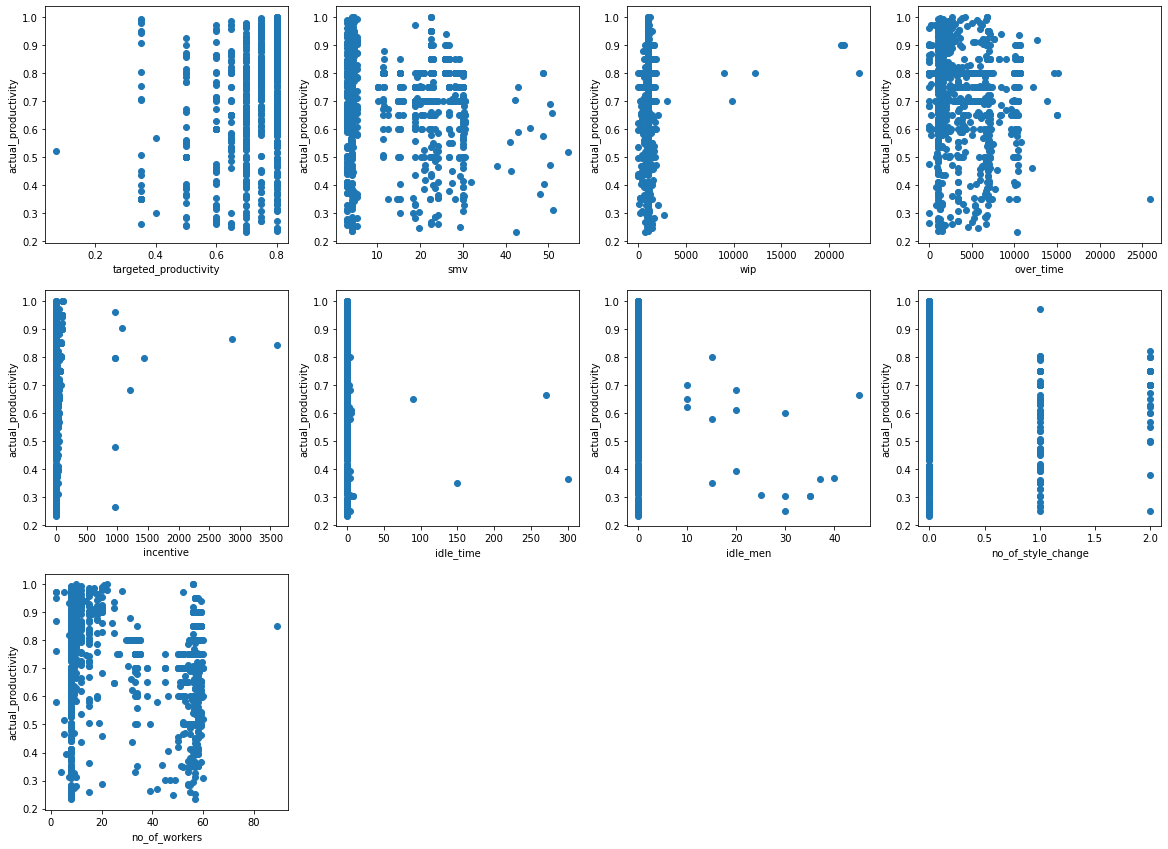

In [80]:
plotVsY()

We can see that the columns incentive, idle time, idle men do not seem to influence the productivity much and they are very densely populated near a single point.
So we will drop these.

In [81]:
data.drop(axis="columns", labels=['incentive','idle_time','idle_men'], inplace=True)

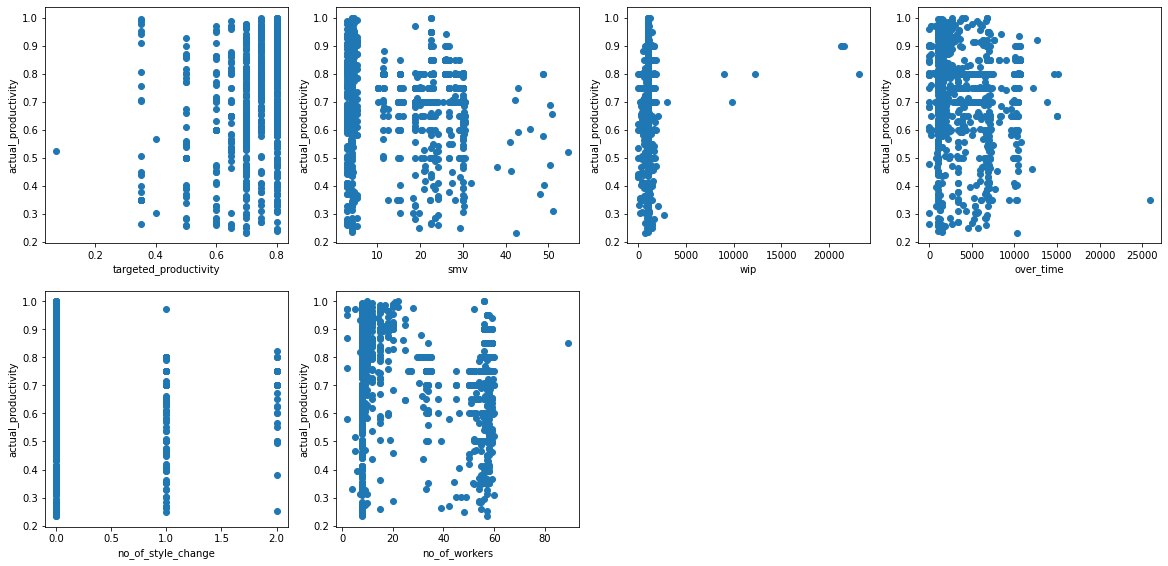

In [82]:
plotVsY()

Checking duplicate rows

In [83]:
data.index[data.duplicated()]

Int64Index([   3,   79,  122,  144,  151,  174,  180,  196,  197,  220,  226,
             231,  232,  241,  243,  263,  281,  348,  384,  522,  523,  566,
             609,  646,  693,  787,  886,  900,  964,  965,  969,  976,  977,
             981,  982,  983,  984, 1042, 1073, 1087, 1099, 1110, 1192],
           dtype='int64')

In [84]:
data=data.drop_duplicates()

In [85]:
data.index[data.duplicated()]

Int64Index([], dtype='int64')

Outliers

Checking for outliers in the data and bringing them into the whiskers' range

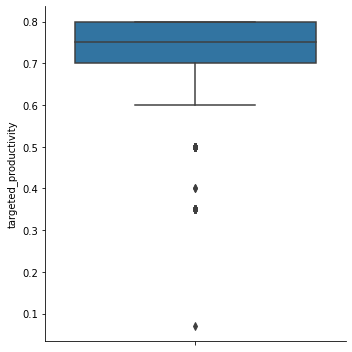

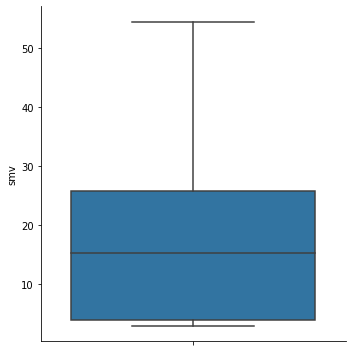

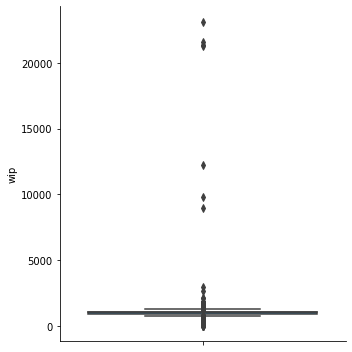

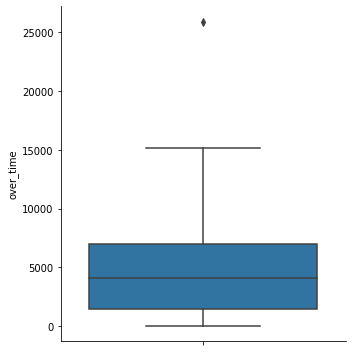

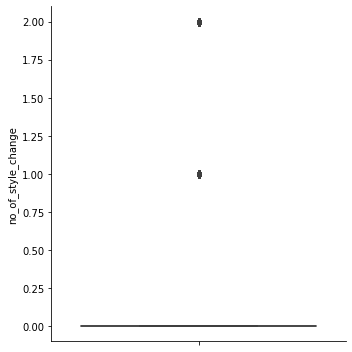

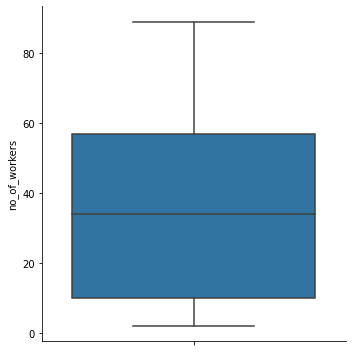

In [86]:
for c in list(data.columns)[:-1]:
  sns.catplot(kind="box",y=c,data=data)

No. of style changes has only 3 unique values, so we will not deal with outliers for that column

In [87]:
def manageOutliers(dt,c):
  lq=dt[c].quantile(0.25)
  uq=dt[c].quantile(0.75)
  uw=uq+1.5*(uq-lq)
  lw=lq-1.5*(uq-lq)
  dt.loc[dt[c]>uw,c]=uw
  dt.loc[dt[c]<lw,c]=lw
  return dt

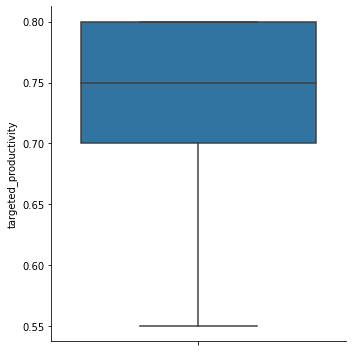

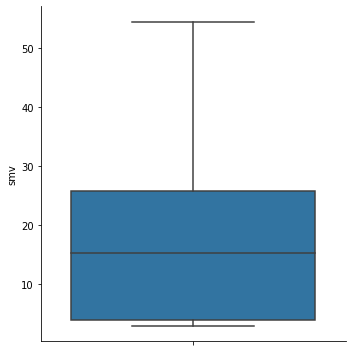

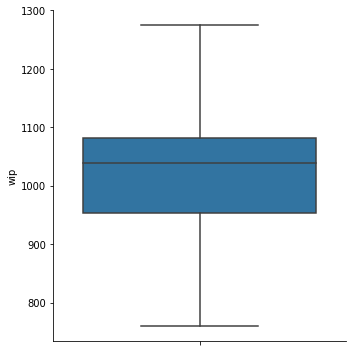

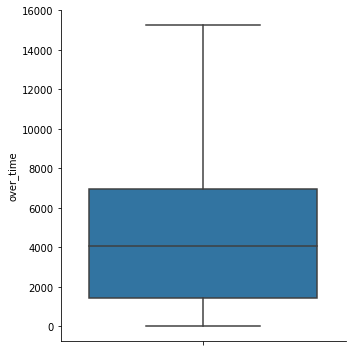

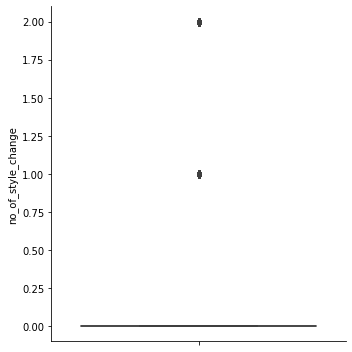

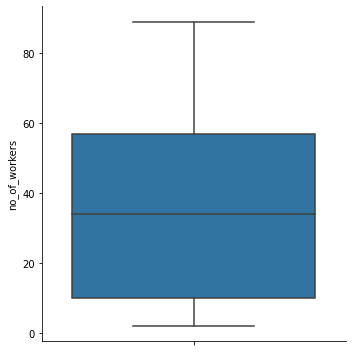

In [88]:
for c in list(data.columns)[:-1]:
  if c!="no_of_style_change":
    manageOutliers(data,c)
  sns.catplot(kind="box",y=c,data=data)

As we changed a few data points(rows), we should again check for duplicate rows

In [89]:
data.index[data.duplicated()]

Int64Index([  75,  107,  159,  175,  229,  267,  286,  304,  339,  346,  363,
             381,  408,  427,  452,  508,  535,  659,  667,  828,  831,  945,
            1031, 1033, 1053, 1078, 1081, 1117, 1120, 1136, 1142, 1160, 1179,
            1180, 1183],
           dtype='int64')

In [90]:
data=data.drop_duplicates()

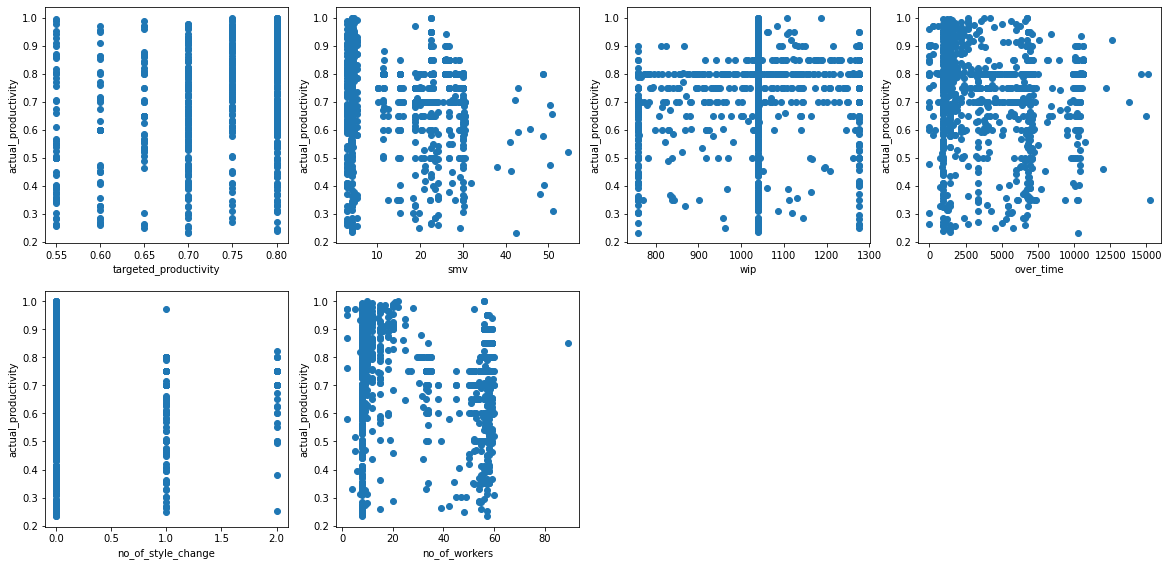

In [91]:
plotVsY()

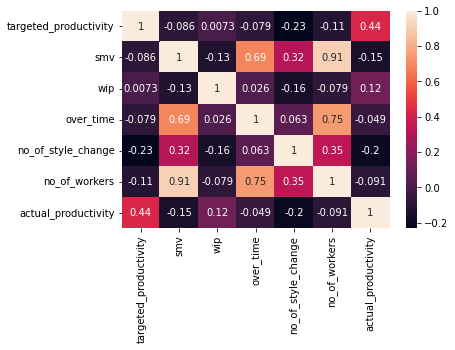

In [92]:
sns.heatmap(data.corr(),annot=True)

In [93]:
class Normalizer:
  def __init__(self,mean,stdev):
    self.mean=mean
    self.stdev=stdev
  def normalize(self,t):
    return (t-self.mean)/(self.stdev)

In [94]:
for c in list(data.columns)[:-1]:
  normalizer=Normalizer(data[c].mean(),data[c].std())
  data[c]=data[c].apply(normalizer.normalize)

Splitting the data into train and test(70-30)

In [95]:
train_set=data.sample(frac=0.7, replace=False)
test_set=data.drop(train_set.index)

train_x=train_set.drop(columns=["actual_productivity"])
train_y=train_set["actual_productivity"]

test_x=test_set.drop(columns=["actual_productivity"])
test_y=test_set["actual_productivity"]

train_x=train_x.to_numpy()
train_y=train_y.to_numpy()
test_x=test_x.to_numpy()
test_y=test_y.to_numpy()

Adding the column of constant term w0 into the X matrix

In [96]:
train_x_final=np.insert(train_x,0,1,axis=1)
test_x_final=np.insert(test_x,0,1,axis=1)

Getting matrices for individual features

In [97]:
np.array([train_x_final[:,0], train_x_final[:,1]]).shape

(2, 757)

I will have to take transpose to create a matrix for only one feature

In [98]:
train_x_final.shape

(757, 7)

In [99]:
train_x1=np.array([train_x_final[:,0], train_x_final[:,1]]).T
train_x2=np.array([train_x_final[:,0], train_x_final[:,2]]).T
train_x3=np.array([train_x_final[:,0], train_x_final[:,3]]).T
train_x4=np.array([train_x_final[:,0], train_x_final[:,4]]).T
train_x5=np.array([train_x_final[:,0], train_x_final[:,5]]).T
train_x6=np.array([train_x_final[:,0], train_x_final[:,6]]).T

test_x1=np.array([test_x_final[:,0], test_x_final[:,1]]).T
test_x2=np.array([test_x_final[:,0], test_x_final[:,2]]).T
test_x3=np.array([test_x_final[:,0], test_x_final[:,3]]).T
test_x4=np.array([test_x_final[:,0], test_x_final[:,4]]).T
test_x5=np.array([test_x_final[:,0], test_x_final[:,5]]).T
test_x6=np.array([test_x_final[:,0], test_x_final[:,6]]).T

#Models

##1. Closed Form

In [100]:
def get_closed_form_coeff(x,y):
  return ((np.linalg.inv((x.T)@x))@(x.T))@y

##2. Gradient Descent

In [101]:
def gradientDescent(w,x,y,n,alpha):
  for i in range(n):
    s=(x@w)
    e=y-s
    delJ=(x.T@(-e))/len(x)
    w=w-alpha*delJ
  return w

##3. Newton's Method

In [102]:
def newtonMethod(w,x,y,n):
  for i in range(n):
    l1=2*((((x.T)@x)@w)-(x.T)@y)
    l2=2*((x.T)@x)
    w=w-((np.linalg.inv(l2))@l1)
  return w

##Find errors

In [103]:
def mse(yp,y):
  return np.mean(np.square(y-yp))
def mae(yp,y):
  return np.mean(np.abs(y-yp))

#Univariate Linear Regression

##1. Targeted productivity

Text(0.5, 1.0, 'Closed Form')

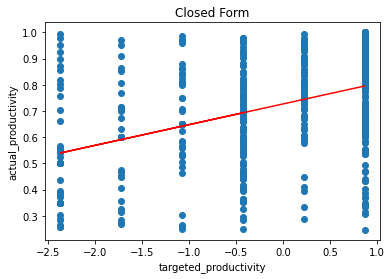

In [104]:
Wcf=get_closed_form_coeff(train_x1,train_y)
plt.scatter(train_x1[:,1],train_y)
plt.plot(train_x1[:,1],Wcf[0]+Wcf[1]*train_x1[:,1],'r')
plt.xlabel("targeted_productivity")
plt.ylabel("actual_productivity")
plt.title("Closed Form")

Text(0.5, 1.0, 'Gradient Descent')

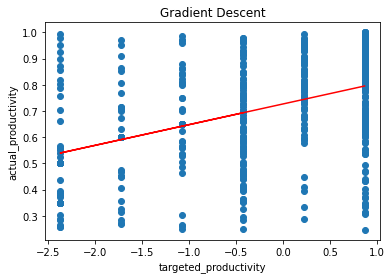

In [105]:
Wgd=gradientDescent(np.array([0.1,1]),train_x1,train_y,4000,0.1)
plt.scatter(train_x1[:,1],train_y)
plt.plot(train_x1[:,1],Wgd[0]+Wgd[1]*train_x1[:,1],'r')
plt.xlabel("targeted_productivity")
plt.ylabel("actual_productivity")
plt.title("Gradient Descent")

Text(0.5, 1.0, "Newton's Method")

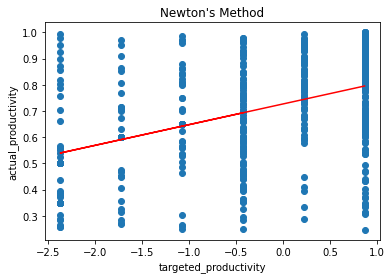

In [106]:
Wnm=newtonMethod(np.array([0.1,1]),train_x1,train_y,1000)
plt.scatter(train_x1[:,1],train_y)
plt.plot(train_x1[:,1],Wnm[0]+Wnm[1]*train_x1[:,1],'r')
plt.xlabel("targeted_productivity")
plt.ylabel("actual_productivity")
plt.title("Newton's Method")

In [107]:
print("Errors:\n1. Closed Form")
print("\t Train error:\t\tTest error:")
print("MSE\t",mse(train_x1@Wcf,train_y),"\t",mse(test_x1@Wcf,test_y))
print("MAE\t",mae(train_x1@Wcf,train_y),"\t",mae(test_x1@Wcf,test_y))

print("2. Gradient Descent")
print("\t Train error:\t\tTest error:")
print("MSE\t",mse(train_x1@Wgd,train_y),"\t",mse(test_x1@Wgd,test_y))
print("MAE\t",mae(train_x1@Wgd,train_y),"\t",mae(test_x1@Wgd,test_y))

print("3. Newton's Method")
print("\t Train error:\t\tTest error:")
print("MSE\t",mse(train_x1@Wnm,train_y),"\t",mse(test_x1@Wnm,test_y))
print("MAE\t",mae(train_x1@Wnm,train_y),"\t",mae(test_x1@Wnm,test_y))

Errors:
1. Closed Form
	 Train error:		Test error:
MSE	 0.022553542290067636 	 0.02654536528763574
MAE	 0.10207835551862805 	 0.11110676754956011
2. Gradient Descent
	 Train error:		Test error:
MSE	 0.022553542290067636 	 0.026545365287635746
MAE	 0.10207835551862783 	 0.11110676754955993
3. Newton's Method
	 Train error:		Test error:
MSE	 0.02255354229006764 	 0.02654536528763575
MAE	 0.10207835551862778 	 0.11110676754955989


##2. SMV

Text(0.5, 1.0, 'Closed Form')

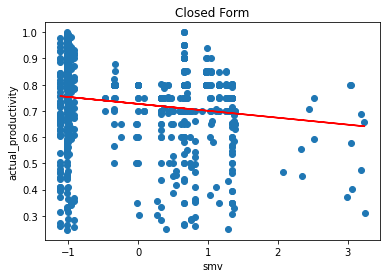

In [108]:
Wcf=get_closed_form_coeff(train_x2,train_y)
plt.scatter(train_x2[:,1],train_y)
plt.plot(train_x2[:,1],Wcf[0]+Wcf[1]*train_x2[:,1],'r')
plt.xlabel("smv")
plt.ylabel("actual_productivity")
plt.title("Closed Form")

Text(0.5, 1.0, 'Gradient Descent')

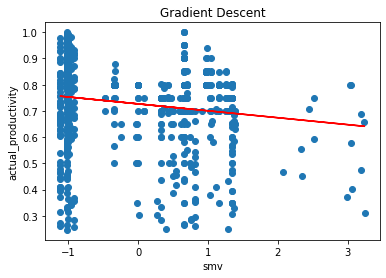

In [109]:
Wgd=gradientDescent(np.array([0.1,1]),train_x2,train_y,4000,0.1)
plt.scatter(train_x2[:,1],train_y)
plt.plot(train_x2[:,1],Wgd[0]+Wgd[1]*train_x2[:,1],'r')
plt.xlabel("smv")
plt.ylabel("actual_productivity")
plt.title("Gradient Descent")

Text(0.5, 1.0, "Newton's Method")

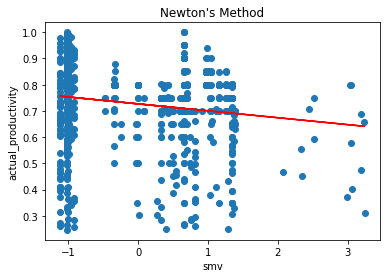

In [110]:
Wnm=newtonMethod(np.array([0.1,1]),train_x2,train_y,1000)
plt.scatter(train_x2[:,1],train_y)
plt.plot(train_x2[:,1],Wnm[0]+Wnm[1]*train_x2[:,1],'r')
plt.xlabel("smv")
plt.ylabel("actual_productivity")
plt.title("Newton's Method")

In [111]:
print("Errors:\n1. Closed Form")
print("\t Train error:\t\tTest error:")
print("MSE\t",mse(train_x2@Wcf,train_y),"\t",mse(test_x2@Wcf,test_y))
print("MAE\t",mae(train_x2@Wcf,train_y),"\t",mae(test_x2@Wcf,test_y))

print("2. Gradient Descent")
print("\t Train error:\t\tTest error:")
print("MSE\t",mse(train_x2@Wgd,train_y),"\t",mse(test_x2@Wgd,test_y))
print("MAE\t",mae(train_x2@Wgd,train_y),"\t",mae(test_x2@Wgd,test_y))

print("3. Newton's Method")
print("\t Train error:\t\tTest error:")
print("MSE\t",mse(train_x2@Wnm,train_y),"\t",mse(test_x2@Wnm,test_y))
print("MAE\t",mae(train_x2@Wnm,train_y),"\t",mae(test_x2@Wnm,test_y))

Errors:
1. Closed Form
	 Train error:		Test error:
MSE	 0.027788072277168712 	 0.030799431652556115
MAE	 0.1299835398309292 	 0.13769285623902525
2. Gradient Descent
	 Train error:		Test error:
MSE	 0.027788072277168712 	 0.030799431652556105
MAE	 0.12998353983092933 	 0.13769285623902536
3. Newton's Method
	 Train error:		Test error:
MSE	 0.027788072277168705 	 0.030799431652556126
MAE	 0.12998353983092908 	 0.1376928562390252


##3. WIP

Text(0.5, 1.0, 'Closed Form')

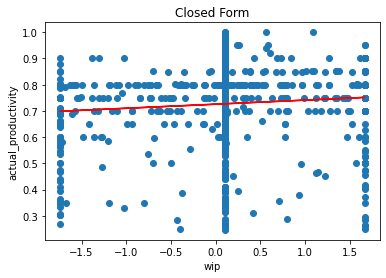

In [112]:
Wcf=get_closed_form_coeff(train_x3,train_y)
plt.scatter(train_x3[:,1],train_y)
plt.plot(train_x3[:,1],Wcf[0]+Wcf[1]*train_x3[:,1],'r')
plt.xlabel("wip")
plt.ylabel("actual_productivity")
plt.title("Closed Form")

Text(0.5, 1.0, 'Gradient Descent')

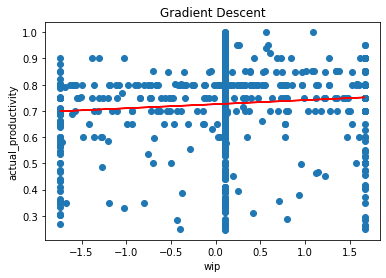

In [113]:
Wgd=gradientDescent(np.array([0.1,1]),train_x3,train_y,4000,0.1)
plt.scatter(train_x3[:,1],train_y)
plt.plot(train_x3[:,1],Wgd[0]+Wgd[1]*train_x3[:,1],'r')
plt.xlabel("wip")
plt.ylabel("actual_productivity")
plt.title("Gradient Descent")

Text(0.5, 1.0, "Newton's Method")

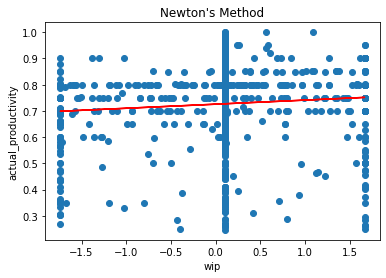

In [114]:
Wnm=newtonMethod(np.array([0.1,1]),train_x3,train_y,1000)
plt.scatter(train_x3[:,1],train_y)
plt.plot(train_x3[:,1],Wnm[0]+Wnm[1]*train_x3[:,1],'r')
plt.xlabel("wip")
plt.ylabel("actual_productivity")
plt.title("Newton's Method")

In [115]:
print("Errors:\n1. Closed Form")
print("\t Train error:\t\tTest error:")
print("MSE\t",mse(train_x3@Wcf,train_y),"\t",mse(test_x3@Wcf,test_y))
print("MAE\t",mae(train_x3@Wcf,train_y),"\t",mae(test_x3@Wcf,test_y))

print("2. Gradient Descent")
print("\t Train error:\t\tTest error:")
print("MSE\t",mse(train_x3@Wgd,train_y),"\t",mse(test_x3@Wgd,test_y))
print("MAE\t",mae(train_x3@Wgd,train_y),"\t",mae(test_x3@Wgd,test_y))

print("3. Newton's Method")
print("\t Train error:\t\tTest error:")
print("MSE\t",mse(train_x3@Wnm,train_y),"\t",mse(test_x3@Wnm,test_y))
print("MAE\t",mae(train_x3@Wnm,train_y),"\t",mae(test_x3@Wnm,test_y))

Errors:
1. Closed Form
	 Train error:		Test error:
MSE	 0.02824939535038426 	 0.030396887698685093
MAE	 0.13031976383987484 	 0.13722347618130792
2. Gradient Descent
	 Train error:		Test error:
MSE	 0.028249395350384253 	 0.030396887698685083
MAE	 0.13031976383987498 	 0.13722347618130806
3. Newton's Method
	 Train error:		Test error:
MSE	 0.02824939535038426 	 0.030396887698685093
MAE	 0.13031976383987484 	 0.13722347618130792


##4. Over time

Text(0.5, 1.0, 'Closed Form')

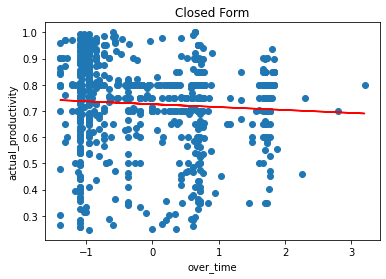

In [116]:
Wcf=get_closed_form_coeff(train_x4,train_y)
plt.scatter(train_x4[:,1],train_y)
plt.plot(train_x4[:,1],Wcf[0]+Wcf[1]*train_x4[:,1],'r')
plt.xlabel("over_time")
plt.ylabel("actual_productivity")
plt.title("Closed Form")

Text(0.5, 1.0, 'Gradient Descent')

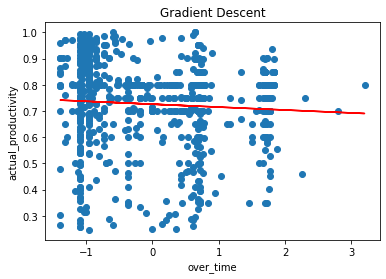

In [117]:
Wgd=gradientDescent(np.array([0.1,1]),train_x4,train_y,4000,0.1)
plt.scatter(train_x4[:,1],train_y)
plt.plot(train_x4[:,1],Wgd[0]+Wgd[1]*train_x4[:,1],'r')
plt.xlabel("over_time")
plt.ylabel("actual_productivity")
plt.title("Gradient Descent")

Text(0.5, 1.0, "Newton's Method")

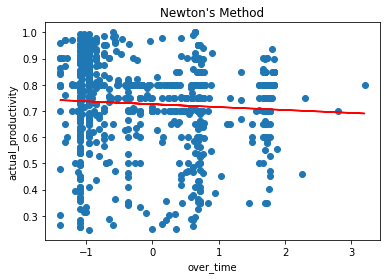

In [118]:
Wnm=newtonMethod(np.array([0.1,1]),train_x4,train_y,1000)
plt.scatter(train_x4[:,1],train_y)
plt.plot(train_x4[:,1],Wnm[0]+Wnm[1]*train_x4[:,1],'r')
plt.xlabel("over_time")
plt.ylabel("actual_productivity")
plt.title("Newton's Method")

In [119]:
print("Errors:\n1. Closed Form")
print("\t Train error:\t\tTest error:")
print("MSE\t",mse(train_x4@Wcf,train_y),"\t",mse(test_x4@Wcf,test_y))
print("MAE\t",mae(train_x4@Wcf,train_y),"\t",mae(test_x4@Wcf,test_y))

print("2. Gradient Descent")
print("\t Train error:\t\tTest error:")
print("MSE\t",mse(train_x4@Wgd,train_y),"\t",mse(test_x4@Wgd,test_y))
print("MAE\t",mae(train_x4@Wgd,train_y),"\t",mae(test_x4@Wgd,test_y))

print("3. Newton's Method")
print("\t Train error:\t\tTest error:")
print("MSE\t",mse(train_x4@Wnm,train_y),"\t",mse(test_x4@Wnm,test_y))
print("MAE\t",mae(train_x4@Wnm,train_y),"\t",mae(test_x4@Wnm,test_y))

Errors:
1. Closed Form
	 Train error:		Test error:
MSE	 0.02837402570443052 	 0.03126892161725486
MAE	 0.13118048657943154 	 0.1398558512710879
2. Gradient Descent
	 Train error:		Test error:
MSE	 0.02837402570443052 	 0.03126892161725486
MAE	 0.13118048657943154 	 0.1398558512710879
3. Newton's Method
	 Train error:		Test error:
MSE	 0.02837402570443053 	 0.03126892161725488
MAE	 0.1311804865794314 	 0.13985585127108777


##5. No. of style changes

Text(0.5, 1.0, 'Closed Form')

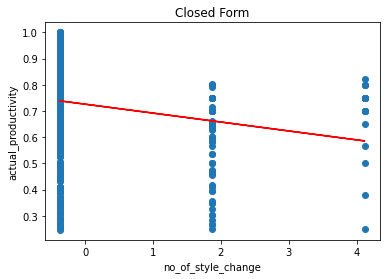

In [120]:
Wcf=get_closed_form_coeff(train_x5,train_y)
plt.scatter(train_x5[:,1],train_y)
plt.plot(train_x5[:,1],Wcf[0]+Wcf[1]*train_x5[:,1],'r')
plt.xlabel("no_of_style_change")
plt.ylabel("actual_productivity")
plt.title("Closed Form")

Text(0.5, 1.0, 'Gradient Descent')

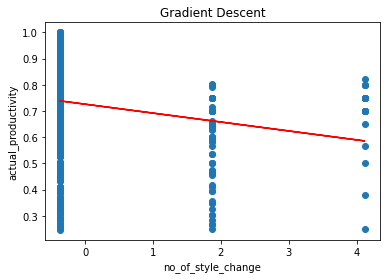

In [121]:
Wgd=gradientDescent(np.array([0.1,1]),train_x5,train_y,4000,0.1)
plt.scatter(train_x5[:,1],train_y)
plt.plot(train_x5[:,1],Wgd[0]+Wgd[1]*train_x5[:,1],'r')
plt.xlabel("no_of_style_change")
plt.ylabel("actual_productivity")
plt.title("Gradient Descent")

Text(0.5, 1.0, "Newton's Method")

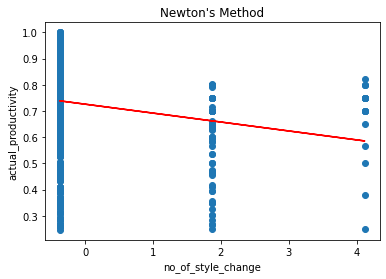

In [122]:
Wnm=newtonMethod(np.array([0.1,1]),train_x5,train_y,1000)
plt.scatter(train_x5[:,1],train_y)
plt.plot(train_x5[:,1],Wnm[0]+Wnm[1]*train_x5[:,1],'r')
plt.xlabel("no_of_style_change")
plt.ylabel("actual_productivity")
plt.title("Newton's Method")

In [123]:
print("Errors:\n1. Closed Form")
print("\t Train error:\t\tTest error:")
print("MSE\t",mse(train_x5@Wcf,train_y),"\t",mse(test_x5@Wcf,test_y))
print("MAE\t",mae(train_x5@Wcf,train_y),"\t",mae(test_x5@Wcf,test_y))

print("2. Gradient Descent")
print("\t Train error:\t\tTest error:")
print("MSE\t",mse(train_x5@Wgd,train_y),"\t",mse(test_x5@Wgd,test_y))
print("MAE\t",mae(train_x5@Wgd,train_y),"\t",mae(test_x5@Wgd,test_y))

print("3. Newton's Method")
print("\t Train error:\t\tTest error:")
print("MSE\t",mse(train_x5@Wnm,train_y),"\t",mse(test_x5@Wnm,test_y))
print("MAE\t",mae(train_x5@Wnm,train_y),"\t",mae(test_x5@Wnm,test_y))

Errors:
1. Closed Form
	 Train error:		Test error:
MSE	 0.027369529551661366 	 0.02987984818013648
MAE	 0.12869655233499344 	 0.13341780686239946
2. Gradient Descent
	 Train error:		Test error:
MSE	 0.02736952955166137 	 0.029879848180136455
MAE	 0.12869655233499366 	 0.13341780686239965
3. Newton's Method
	 Train error:		Test error:
MSE	 0.027369529551661366 	 0.029879848180136472
MAE	 0.12869655233499344 	 0.13341780686239946


##6. No. of workers

Text(0.5, 1.0, 'Closed Form')

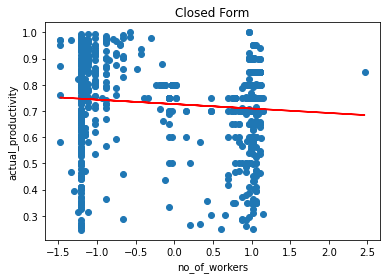

In [124]:
Wcf=get_closed_form_coeff(train_x6,train_y)
plt.scatter(train_x6[:,1],train_y)
plt.plot(train_x6[:,1],Wcf[0]+Wcf[1]*train_x6[:,1],'r')
plt.xlabel("no_of_workers")
plt.ylabel("actual_productivity")
plt.title("Closed Form")

Text(0.5, 1.0, 'Gradient Descent')

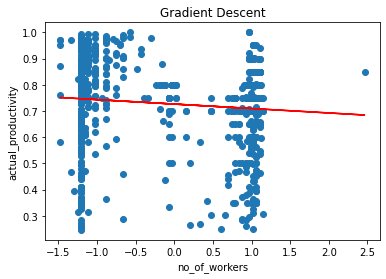

In [125]:
Wgd=gradientDescent(np.array([0.1,1]),train_x6,train_y,4000,0.1)
plt.scatter(train_x6[:,1],train_y)
plt.plot(train_x6[:,1],Wgd[0]+Wgd[1]*train_x6[:,1],'r')
plt.xlabel("no_of_workers")
plt.ylabel("actual_productivity")
plt.title("Gradient Descent")

Text(0.5, 1.0, "Newton's Method")

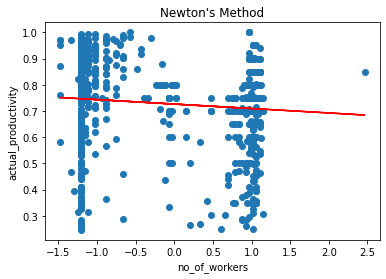

In [126]:
Wnm=newtonMethod(np.array([0.1,1]),train_x6,train_y,1000)
plt.scatter(train_x6[:,1],train_y)
plt.plot(train_x6[:,1],Wnm[0]+Wnm[1]*train_x6[:,1],'r')
plt.xlabel("no_of_workers")
plt.ylabel("actual_productivity")
plt.title("Newton's Method")

In [127]:
print("Errors:\n1. Closed Form")
print("\t Train error:\t\tTest error:")
print("MSE\t",mse(train_x6@Wcf,train_y),"\t",mse(test_x6@Wcf,test_y))
print("MAE\t",mae(train_x6@Wcf,train_y),"\t",mae(test_x6@Wcf,test_y))

print("2. Gradient Descent")
print("\t Train error:\t\tTest error:")
print("MSE\t",mse(train_x6@Wgd,train_y),"\t",mse(test_x6@Wgd,test_y))
print("MAE\t",mae(train_x6@Wgd,train_y),"\t",mae(test_x6@Wgd,test_y))

print("3. Newton's Method")
print("\t Train error:\t\tTest error:")
print("MSE\t",mse(train_x6@Wnm,train_y),"\t",mse(test_x6@Wnm,test_y))
print("MAE\t",mae(train_x6@Wnm,train_y),"\t",mae(test_x6@Wnm,test_y))

Errors:
1. Closed Form
	 Train error:		Test error:
MSE	 0.028204892520006252 	 0.031078018532704678
MAE	 0.13072064150380153 	 0.13883739610242538
2. Gradient Descent
	 Train error:		Test error:
MSE	 0.028204892520006252 	 0.031078018532704678
MAE	 0.13072064150380153 	 0.13883739610242538
3. Newton's Method
	 Train error:		Test error:
MSE	 0.028204892520006252 	 0.03107801853270469
MAE	 0.13072064150380136 	 0.13883739610242526


#Multivariate Linear Regression

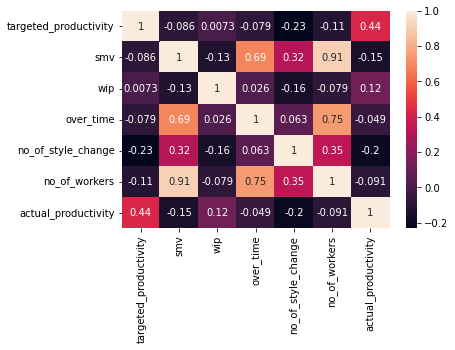

In [128]:
sns.heatmap(data.corr(),annot=True)

We will drop no_of_workers columns because of high correlation with smv

In [129]:
data.drop(axis="columns",labels=['no_of_workers'], inplace=True)
data.index[data.duplicated()]

Int64Index([217, 658, 906], dtype='int64')

As we have got duplicate rows now, we need to again do train-test split

In [130]:
data=data.drop_duplicates()
train_set=data.sample(frac=0.7, replace=False)
test_set=data.drop(train_set.index)

train_x=train_set.drop(columns=["actual_productivity"])
train_y=train_set["actual_productivity"]

test_x=test_set.drop(columns=["actual_productivity"])
test_y=test_set["actual_productivity"]

train_x=train_x.to_numpy()
train_y=train_y.to_numpy()
test_x=test_x.to_numpy()
test_y=test_y.to_numpy()

train_x_final=np.insert(train_x,0,1,axis=1)
test_x_final=np.insert(test_x,0,1,axis=1)

In [131]:
train_x_final.shape

(755, 6)

In [132]:
Wcf=get_closed_form_coeff(train_x_final,train_y)
Wgd=gradientDescent(np.array([0.1,0.1,0.1,0.1,0.1,0.1]),train_x_final,train_y,4000,0.1)
Wnm=newtonMethod(np.array([0.1,0.1,0.1,0.1,0.1,0.1]),train_x_final,train_y,1000)

print("Errors:\n1. Closed Form")
print("\t Train error:\t\tTest error:")
print("MSE\t",mse(train_x_final@Wcf,train_y),"\t",mse(test_x_final@Wcf,test_y))
print("MAE\t",mae(train_x_final@Wcf,train_y),"\t",mae(test_x_final@Wcf,test_y))

print("2. Gradient Descent")
print("\t Train error:\t\tTest error:")
print("MSE\t",mse(train_x_final@Wgd,train_y),"\t",mse(test_x_final@Wgd,test_y))
print("MAE\t",mae(train_x_final@Wgd,train_y),"\t",mae(test_x_final@Wgd,test_y))

print("3. Newton's Method")
print("\t Train error:\t\tTest error:")
print("MSE\t",mse(train_x_final@Wnm,train_y),"\t",mse(test_x_final@Wnm,test_y))
print("MAE\t",mae(train_x_final@Wnm,train_y),"\t",mae(test_x_final@Wnm,test_y))

Errors:
1. Closed Form
	 Train error:		Test error:
MSE	 0.022801745651421138 	 0.023172080470245344
MAE	 0.10883500704184693 	 0.1081823885969133
2. Gradient Descent
	 Train error:		Test error:
MSE	 0.02280174565142113 	 0.023172080470245337
MAE	 0.1088350070418471 	 0.10818238859691343
3. Newton's Method
	 Train error:		Test error:
MSE	 0.02280174565142113 	 0.02317208047024534
MAE	 0.10883500704184684 	 0.10818238859691322
